In [231]:
import os
os.listdir('/Users/abhishekshah/Desktop/EDA')

['StackOverflowAnalysis.ipynb',
 'survey_results_public.csv',
 '.DS_Store',
 'stack-overflow-developer-survey-2021.zip',
 'stack-overflow-developer-survey-2020.zip',
 'survey_results_schema.csv',
 '.ipynb_checkpoints',
 'README_2021.txt',
 'nba2019.csv',
 'so_survey_2021.pdf',
 'pandas_exploratory_data_analysis.ipynb',
 'stack-overflow-developer-survey-2020']

In [232]:
import pandas as pd
survey_raw_df =pd.read_csv('survey_results_public.csv')
survey_raw_df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [233]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [234]:
schema_raw=pd.read_csv('survey_results_schema.csv',index_col='Column').QuestionText
schema_raw.head()

Column
Respondent    Randomized respondent ID number (not in order ...
MainBranch    Which of the following options best describes ...
Hobbyist                                Do you code as a hobby?
Age           What is your age (in years)? If you prefer not...
Age1stCode    At what age did you write your first line of c...
Name: QuestionText, dtype: object

In [235]:
schema=schema_raw.copy()

In [236]:
schema_raw['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

```
Data Preparation and Cleaning 

```

- Demographic of the survey respondents and the global programming community
- Distribution of programming skills, experince and preferences
- Employment-related information, preference and opinions

Let's select a subset of columns with the relevant data for our analysis

In [237]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [238]:
len(selected_columns)

20

Creating a copy of the data from these columns into a new data frame `survey_df`, which we can continue to modify further without affecting original dataframe.

In [239]:
survey_df = survey_raw_df[selected_columns].copy()

Looking for some basic info about the data frame

In [240]:
survey_df.shape

(64461, 20)

In [241]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

Most columns have the data type object, either because they contain values of different types,
or they contain empty values, which are represented using NaN . It appears that every column
contains some empty values, since the Non-Null count for every column is lower than the total
number of rows (64461). We'll need to deal with empty values and manually adjust the data type
for each column on a case-by-case basis.

In [242]:
survey_df.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [243]:
survey_df.YearsCode.unique()

array(['36', '7', '4', '15', '6', '17', '8', '10', '35', '5', '37', '19',
       '9', '22', '30', '23', '20', '2', 'Less than 1 year', '3', '13',
       '25', '16', '43', '11', '38', '33', nan, '24', '21', '12', '40',
       '27', '50', '46', '14', '18', '28', '32', '44', '26', '42', '31',
       '34', '29', '1', '39', '41', '45', 'More than 50 years', '47',
       '49', '48'], dtype=object)

In [244]:
survey_df.YearsCodePro.unique()

array(['27', '4', nan, '8', '13', '2', '7', '20', '1', '23', '3', '12',
       '17', '18', '10', '14', '29', '6', '28', '9', '15', '11', '16',
       '25', 'Less than 1 year', '5', '21', '19', '35', '24', '32', '22',
       '30', '38', '26', '40', '33', '31', 'More than 50 years', '34',
       '36', '39', '37', '41', '45', '47', '42', '46', '50', '43', '44',
       '48', '49'], dtype=object)

In [245]:
survey_df['Age1stCode']=pd.to_numeric(survey_df.Age1stCode,errors='coerce')
survey_df['YearsCode']=pd.to_numeric(survey_df.YearsCode,errors='coerce')
survey_df['YearsCodePro']=pd.to_numeric(survey_df.YearsCodePro,errors='coerce')

Let's view the basic statistics about the numeric columns

In [246]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


The age column appears to be broken, as the minimum and maximum values are 1 and 279. This is a common problem with surveys: responses may contain invalid values as a result of unintentional or intentional errors during the response process. A simple fix would be to treat rows with ages greater than 100 years or less than ten years as invalid survey responses. We can accomplish this by employing the.drop method.

In [247]:
survey_df.drop(survey_df[survey_df['Age']<10].index,inplace=True)
survey_df.drop(survey_df[survey_df['Age']>90].index,inplace=True)
survey_df.drop(survey_df[survey_df['WorkWeekHrs']>140].index,inplace=True)

Also the `WorkWeekHrs` cannot be more than 140 so any value higher than 140 can be dropped.

In [248]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45304.000000,57315.000000,56625.000000,43987.000000,40995.000000
mean,30.810193,15.475635,12.784336,8.873099,40.024497
std,9.429350,5.115102,9.494409,7.762089,10.628110
min,10.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,43.000000
max,89.000000,85.000000,50.000000,50.000000,140.000000


In [249]:
survey_df.Gender.value_counts()

Man                                                            45891
Woman                                                           3833
Non-binary, genderqueer, or gender non-conforming                382
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       23
Name: Gender, dtype: int64

In [250]:
import numpy as np

In [251]:
survey_df.where(~(survey_df.Gender.str.contains(';',na=False)),np.nan,inplace=True)

In [252]:
survey_df.Gender.value_counts()

Man                                                  45891
Woman                                                 3833
Non-binary, genderqueer, or gender non-conforming      382
Name: Gender, dtype: int64

In [253]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
6148,Turkey,40.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,17.0,20.0,NaN,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once every few years,Visit Stack Overflow;Watch help / tutorial vid...,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",NaN,NaN,NaN,NaN,Not at all important/not necessary
19396,Israel,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",No,17.0,37.0,32.0,C#;C++;Java;SQL,Dart;Kotlin,NaN,Call a coworker or friend;Visit Stack Overflow...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",40.0,Neither satisfied nor dissatisfied,Flex time or a flexible schedule;Remote work o...,Sometimes: 1-2 days per month but less than we...,Very important
53112,United States,30.0,Woman,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Information systems, information technology, o...",No,19.0,11.0,7.0,Bash/Shell/PowerShell;C;C#;C++;JavaScript;Perl...,Bash/Shell/PowerShell;JavaScript;SQL,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, desktop or enterprise applications;...",40.0,Slightly satisfied,Diversity of the company or organization;Offic...,Occasionally: 1-2 days per quarter but less th...,Very important
11467,Switzerland,49.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Another engineering discipline (such as civil,...",Yes,15.0,3.0,3.0,C#;HTML/CSS;PHP,C#;C++;HTML/CSS;PHP,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...",Senior executive/VP,50.0,Very satisfied,Diversity of the company or organization;Offic...,Often: 1-2 days per week or more,Critically important
55559,Spain,39.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,16.0,20.0,10.0,HTML/CSS;JavaScript;TypeScript,Assembly;Bash/Shell/PowerShell;Rust,Once a year,Meditate;Call a coworker or friend;Visit Stack...,Employed full-time,"Developer, full-stack",40.0,Slightly dissatisfied,"Industry that I’d be working in;Languages, fra...",Sometimes: 1-2 days per month but less than we...,Critically important
37605,India,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,19.0,8.0,5.0,NaN,NaN,NaN,NaN,"Independent contractor, freelancer, or self-em...","Developer, back-end;Developer, front-end;Devel...",NaN,Slightly satisfied,NaN,NaN,Very important
5952,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,NaN,12.0,9.0,Bash/Shell/PowerShell;C;C++;Haskell;HTML/CSS;J...,Assembly;Bash/Shell/PowerShell;C;C++;Haskell;H...,Once a year,Meditate;Visit Stack Overflow;Go for a walk or...,Employed full-time,"Academic researcher;Developer, back-end;Develo...",35.0,Very satisfied,Industry that I’d be working in;How widely use...,Occasionally: 1-2 days per quarter but less th...,Critically important
9726,France,24.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,11.0,7.0,2.0,JavaScript,Rust;Swift,Once a year,Visit Stack Overflow,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",40.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Rarely: 1-2 days per year or less,Very important
53104,United States,29.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Another engineering discipline (such as civil,...",Yes,17.0,12.0,12.0,JavaScript;Python;SQL,JavaScript;Python,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,Data scientist or machine learni

In [254]:
survey_df.LanguageWorkedWith.value_counts()

HTML/CSS;JavaScript;PHP;SQL                                                         1064
HTML/CSS;JavaScript                                                                  895
C#;HTML/CSS;JavaScript;SQL                                                           849
C#;HTML/CSS;JavaScript;SQL;TypeScript                                                744
HTML/CSS;JavaScript;TypeScript                                                       693
                                                                                    ... 
C;HTML/CSS;Java;Objective-C;Swift                                                      1
Bash/Shell/PowerShell;C#;HTML/CSS;Java;JavaScript;PHP;Python;R;SQL;VBA                 1
C;Haskell;Java;Julia;Python;R                                                          1
C;C#;C++;HTML/CSS;Objective-C;SQL;Swift                                                1
Bash/Shell/PowerShell;C;C#;C++;HTML/CSS;Java;JavaScript;Objective-C;Python;Swift       1
Name: LanguageWorkedW

Exploratory Data Analysis and Visualization
- Demographic i.e Country, age, gender, education level, employment level

In [255]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [256]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,7)
matplotlib.rcParams['figure.facecolor']='#00000000'

Country: Going to look at the responses in the survey and plot the 10 countries with the highest responses

In [257]:
schema.Country

'Where do you live?'

In [258]:
survey_df.Country.nunique()

183

We can try to look at the countries with the highest number of the respondents using the value_count function

In [259]:
top_countries=survey_df.Country.value_counts().head(15)
top_countries

United States         12370
India                  8360
United Kingdom         3880
Germany                3864
Canada                 2174
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

We can now visualize this information using the bar chart

In [260]:
top_countries.index

Index(['United States', 'India', 'United Kingdom', 'Germany', 'Canada',
       'France', 'Brazil', 'Netherlands', 'Poland', 'Australia', 'Spain',
       'Italy', 'Russian Federation', 'Sweden', 'Pakistan'],
      dtype='object')

In [261]:
top_countries

United States         12370
India                  8360
United Kingdom         3880
Germany                3864
Canada                 2174
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

<AxesSubplot:title={'center':'Where do you live?'}, ylabel='Country'>

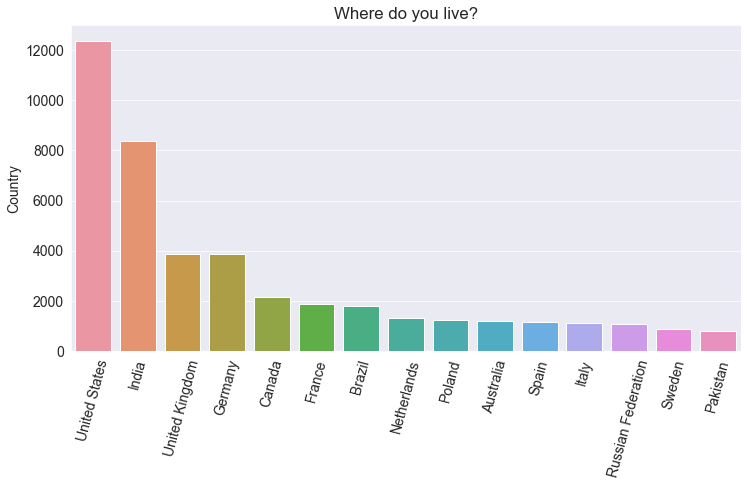

In [262]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(x=top_countries.index,y=top_countries)

The survey appears to have a vastly higher number of respondents from the US and India, which is to be expected given that these two nations have the greatest populations (apart from China) and that English is the most widely spoken language among professionals in the US, India, and UK.
However, it is clear that the study may not be entirely representative of the programming community, particularly among non-English speaking nations.

Age: The distribution of the age of the respondents is another factor to look at and use the histogram to visualize that information

(array([  209.,  2419.,  9135., 11938.,  8739.,  5582.,  3031.,  1756.,
         1038.,   622.,   333.,   143.,    75.]),
 array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]),
 <BarContainer object of 13 artists>)

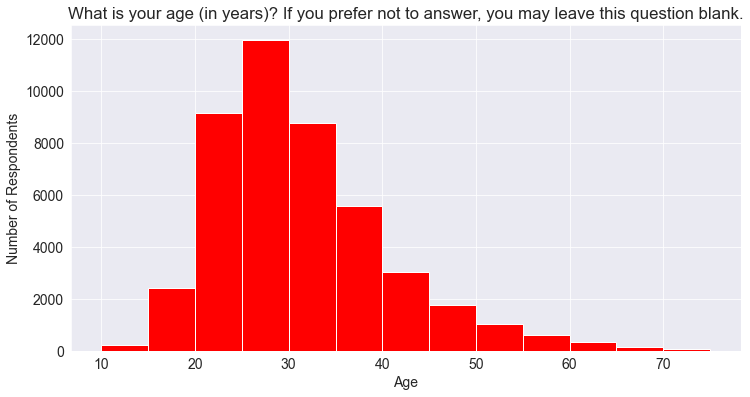

In [263]:
plt.figure(figsize=(12,6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of Respondents')
plt.hist(survey_df.Age,bins=np.arange(10,80,5),color='red')


It seems like a large % of respondents are in the age range of 20-45 yrs. which is valid.

Gender: We can also look at the gender distribution of the responses. 

In [264]:
gender_counts =survey_df.Gender.value_counts()
gender_counts

Man                                                  45891
Woman                                                 3833
Non-binary, genderqueer, or gender non-conforming      382
Name: Gender, dtype: int64

In [265]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

Pie-chart maybe a good representation to visualize the distribution

([<matplotlib.patches.Wedge at 0x7feee1bc2a90>,
 [Text(1.0618100743959473, -0.2873314565293413, 'Man'),
  Text(-1.054624335556226, 0.31267796668871506, 'Woman'),
  Text(-1.0996845102103354, 0.026343462252610098, 'Non-binary, genderqueer, or gender non-conforming')],
 [Text(0.5791691314886985, -0.15672624901600432, '91.6%'),
  Text(-0.5752496375761231, 0.17055161819384454, '7.6%'),
  Text(-0.5998279146601829, 0.014369161228696414, '0.8%')])

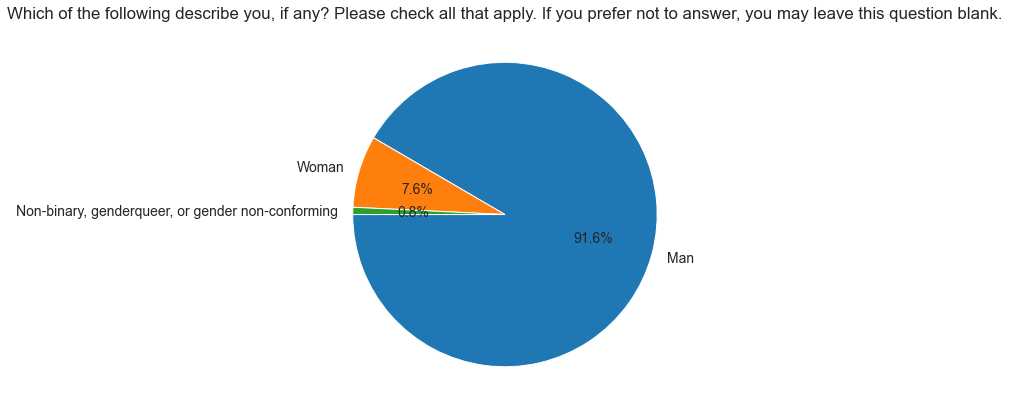

In [266]:
plt.figure(figsize=(10,7))
plt.title(schema.Gender)
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%',startangle=180)

Only 8% of the respondents are women and less than 1% of the population are non-binary. Most respondents 91% are male.

Edulation levels amoung the repondents

Text(0, 0.5, '')

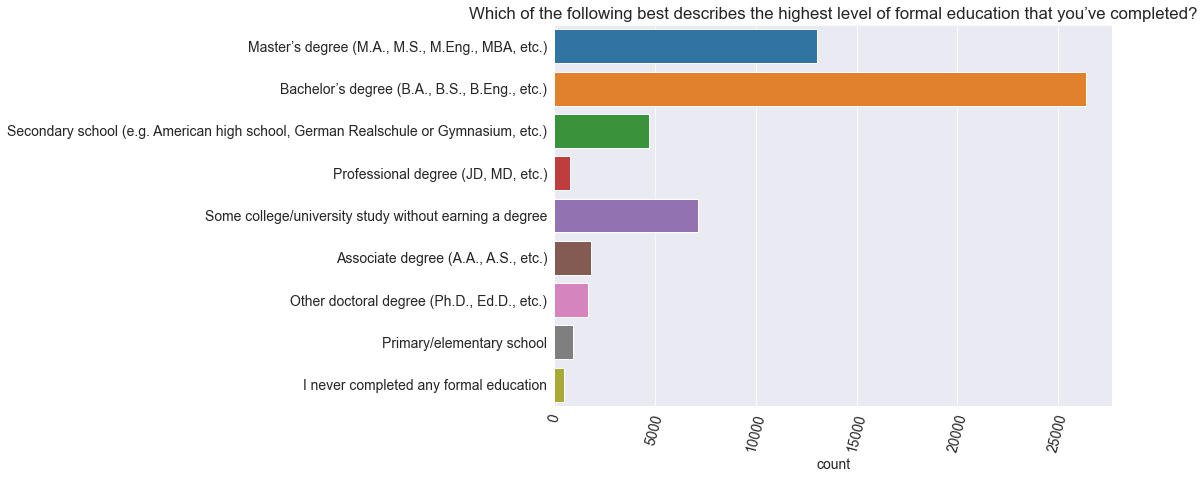

In [267]:
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=75)
plt.title(schema.EdLevel)
plt.ylabel(None)

Seems like most people have a Bachelors degree

In [268]:
schema.UndergradMajor

'What was your primary field of study?'

In [269]:
survey_df.UndergradMajor.value_counts()


Computer science, computer engineering, or software engineering                   31348
Another engineering discipline (such as civil, electrical, mechanical, etc.)       4735
Information systems, information technology, or system administration              4041
A natural science (such as biology, chemistry, physics, etc.)                      2185
Mathematics or statistics                                                          1836
Web development or web design                                                      1772
A business discipline (such as accounting, finance, marketing, etc.)               1365
A humanities discipline (such as literature, history, philosophy, etc.)             997
A social science (such as anthropology, psychology, political science, etc.)        922
Fine arts or performing arts (such as graphic design, music, studio art, etc.)      715
I never declared a major                                                            447
A health science (such as nursin

In [270]:
undergrad_pct=survey_df.UndergradMajor.value_counts() * 100 /survey_df.UndergradMajor.count()
undergrad_pct

Computer science, computer engineering, or software engineering                   61.940328
Another engineering discipline (such as civil, electrical, mechanical, etc.)       9.355859
Information systems, information technology, or system administration              7.984588
A natural science (such as biology, chemistry, physics, etc.)                      4.317329
Mathematics or statistics                                                          3.627742
Web development or web design                                                      3.501284
A business discipline (such as accounting, finance, marketing, etc.)               2.697095
A humanities discipline (such as literature, history, philosophy, etc.)            1.969966
A social science (such as anthropology, psychology, political science, etc.)       1.821774
Fine arts or performing arts (such as graphic design, music, studio art, etc.)     1.412764
I never declared a major                                                        

Text(0.5, 0, 'Percentage')

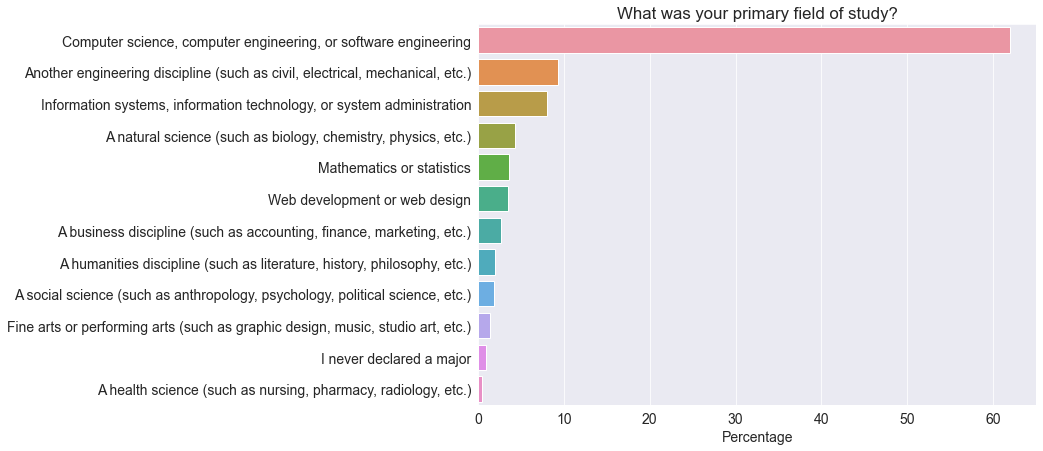

In [271]:
sns.barplot(x=undergrad_pct,y=undergrad_pct.index)
plt.title(schema.UndergradMajor)
plt.ylabel(None)
plt.xlabel('Percentage')

Employment: We will look at the freelancing or contract work choices of the programmers and compare the breakdown between the full time, part time, & freelance works and visualize the data from the employment column.

In [272]:
schema.Employment

'Which of the following best describes your current employment status?'

Normalize function changes it to %

Text(0.5, 0, 'Percentage')

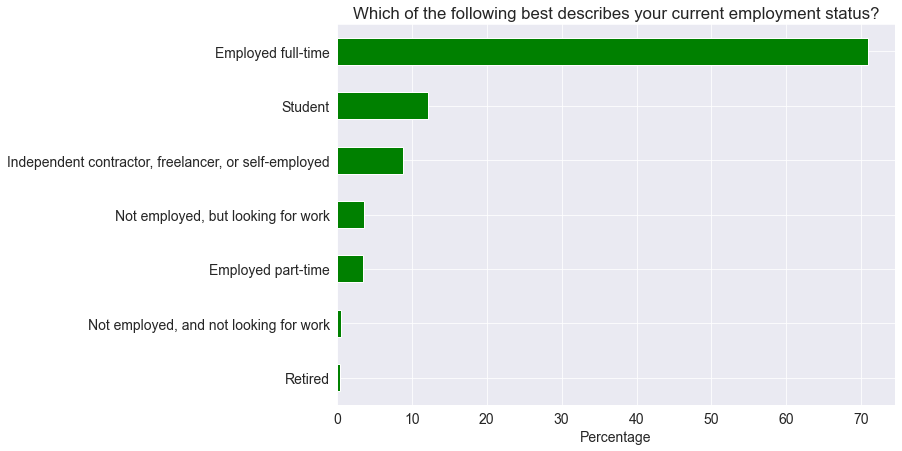

In [273]:
(survey_df.Employment.value_counts(normalize=True,ascending=True)*100).plot.barh(color='green')
plt.title(schema.Employment)
plt.xlabel('Percentage')

Looks like 10% of the respondents are employed part time or as freelancers

The `DevType` field contains information about the roles held by the respondents. Since the question allows multiple answers, the column contains list of the values separated by `;` which makes it hard to analyze

In [274]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [275]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                           4395
Developer, back-end                                                                                                                                                             3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                  2214
Developer, back-end;Developer, full-stack                                                                                                                                       1465
Developer, front-end                                                                                                                                                            1390
                                                                                               

Because the columns are hard to sperate, a simple column separation function is needed.

In [276]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

Passing this function though the `survery_df.DevType`

In [277]:
dev_type_df =split_multicolumn(survey_df.DevType)

In [278]:
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


As we can see the we have one column for each column for each type (23 total)

In [279]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=True)
dev_type_totals

Marketing or sales professional                    624
Senior executive/VP                               1291
Engineer, site reliability                        1920
Scientist                                         2058
Product manager                                   2470
Engineering manager                               2698
Developer, game or graphics                       2749
Educator                                          2894
Academic researcher                               3501
Engineer, data                                    3699
Developer, QA or test                             3892
Data scientist or machine learning specialist     3937
Data or business analyst                          3969
Developer, embedded applications or devices       4700
System administrator                              5183
Designer                                          5260
Database administrator                            5655
DevOps specialist                                 5913
Developer,

<AxesSubplot:>

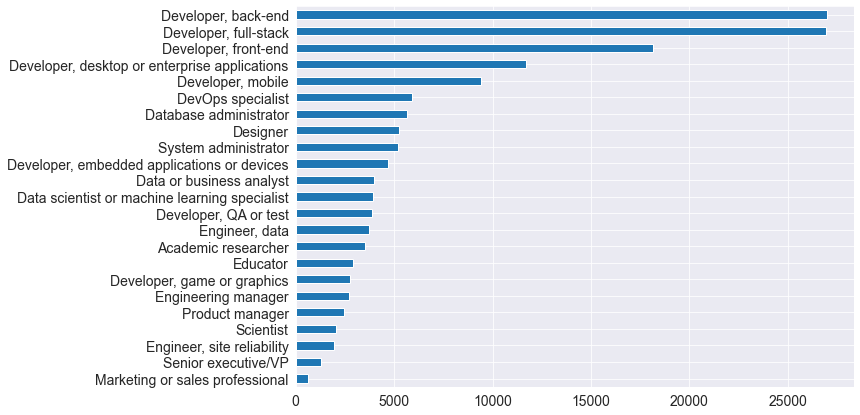

In [280]:
dev_type_totals.plot.barh()

 which were the most popular programming languages in 2020? Do you answer this question we need to use `languageWorkedWith` column

In [281]:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64291, dtype: object

Since there are multiple languages separated by`;` we would need to separate these out using our multi column split function.

In [282]:
language_worked_df =split_multicolumn(survey_df.LanguageWorkedWith)

In [283]:
schema.LanguageWorkedWith

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [284]:
schema.LanguageDesireNextYear

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [285]:
language_worked_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [286]:
language_worked_percentages=language_worked_df.mean().sort_values(ascending=False)*100
language_worked_percentages

JavaScript               59.896409
HTML/CSS                 55.805634
SQL                      48.445350
Python                   39.002349
Java                     35.620849
Bash/Shell/PowerShell    29.240485
C#                       27.801714
PHP                      23.126099
TypeScript               22.463486
C++                      21.111820
C                        19.234419
Go                        7.756918
Kotlin                    6.885878
Ruby                      6.223266
Assembly                  5.442441
VBA                       5.389557
Swift                     5.224682
R                         5.059806
Rust                      4.496741
Objective-C               3.600815
Dart                      3.513711
Scala                     3.148186
Perl                      2.754662
Haskell                   1.858736
Julia                     0.779269
dtype: float64

We can now plot this in the Bar chart.Looks like JavaScript is the most popular language

Text(0.5, 0, 'Count')

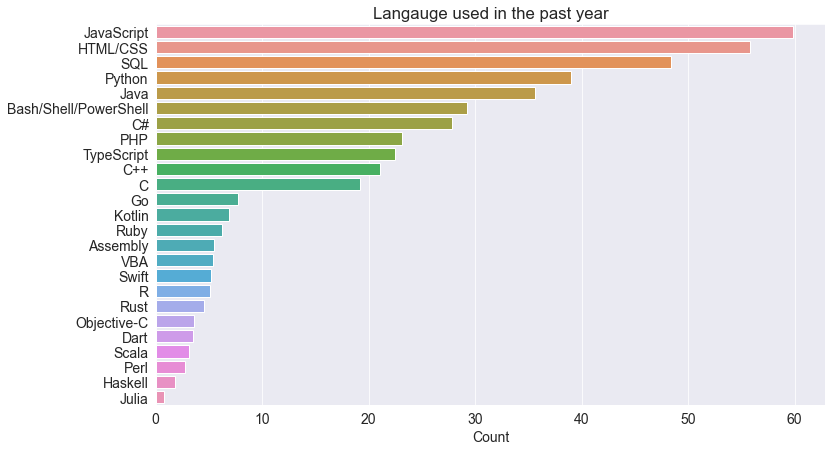

In [287]:
plt.figure(figsize=(12,7))
sns.barplot(x=language_worked_percentages,y=language_worked_percentages.index)
plt.title('Langauge used in the past year')
plt.xlabel('Count')

We need to answer which languages are the most people interested to learn over the next year. For this we need to use the `LanguageDesireNextYear` column and process it.

In [288]:
survey_df.LanguageDesireNextYear.head()

0      C#;HTML/CSS;JavaScript
1                Python;Swift
2    Objective-C;Python;Swift
3                         NaN
4             Java;Ruby;Scala
Name: LanguageDesireNextYear, dtype: object

In [289]:
language_interested_df =split_multicolumn(survey_df.LanguageDesireNextYear)
language_interested_percentage=language_interested_df.mean().sort_values(ascending=False)*100
language_interested_percentage

Python                   41.150394
JavaScript               40.430231
HTML/CSS                 32.032477
SQL                      30.803689
TypeScript               26.456269
C#                       21.060491
Java                     20.464762
Go                       19.433513
Bash/Shell/PowerShell    18.058515
Rust                     16.271329
C++                      15.014543
Kotlin                   14.761009
PHP                      10.945544
C                         9.362119
Swift                     8.693285
Dart                      7.308955
R                         6.571682
Ruby                      6.423916
Scala                     5.327340
Haskell                   4.594733
Assembly                  3.767246
Julia                     2.541569
Objective-C               2.339363
Perl                      1.760744
VBA                       1.608312
dtype: float64

Text(0.5, 0, 'Count')

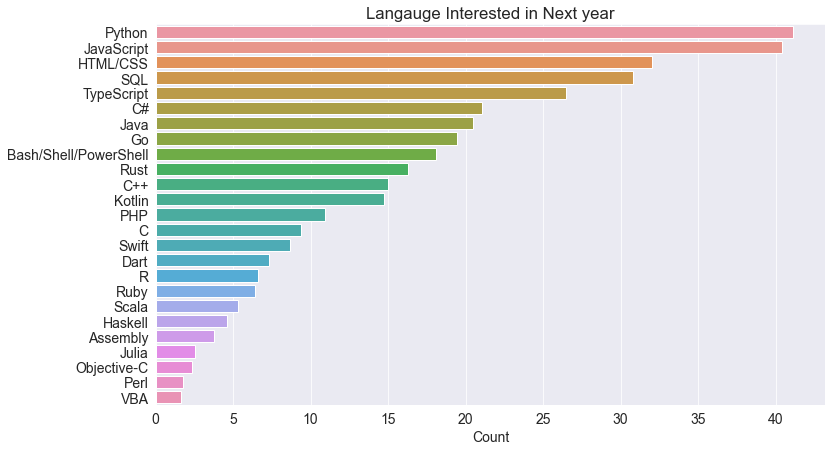

In [290]:
plt.figure(figsize=(12,7))
sns.barplot(x=language_interested_percentage,y=language_interested_percentage.index)
plt.title('Langauge Interested in Next year')
plt.xlabel('Count')

It seems like the python is the language that most people are interested in since it's a general purpose programming languages which is well-suited for application development,numerical computing, data analysis, machine learning, and big data. It can also be used in cloud automation,Web scraping and scripting. 

 we're also going to look at which is the most loved languages that has a high percentage of people who have use the language and want to continue learning and using the same language over the next year.

In [291]:
language_loved_df = language_worked_df & language_interested_df

This performs a boolean & function

In [292]:
language_loved_percentage = (language_loved_df.sum()*100/ language_worked_df.sum()).sort_values(ascending=False)

In [293]:
language_loved_percentage

Rust                     86.129367
TypeScript               67.123667
Python                   66.608175
Kotlin                   62.841653
Go                       62.201724
Dart                     62.107127
Julia                    61.676647
C#                       59.639700
Swift                    59.511759
JavaScript               58.356705
SQL                      56.614011
Bash/Shell/PowerShell    53.694345
HTML/CSS                 53.497965
Scala                    53.310277
Haskell                  51.464435
R                        44.482017
Java                     44.115977
C++                      43.431813
Ruby                     42.764309
PHP                      37.227603
C                        32.993692
Assembly                 29.122606
Perl                     28.402033
Objective-C              23.153348
VBA                      19.480519
dtype: float64

Plotting the `langauge_loved_percentage`

Text(0.5, 0, 'Count')

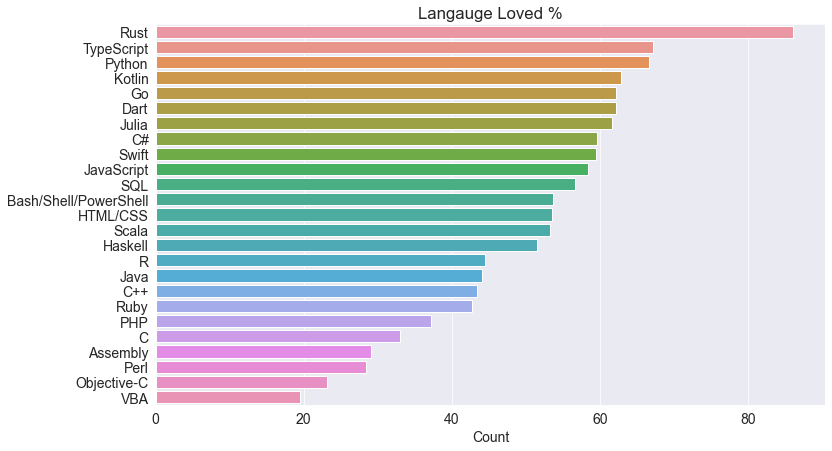

In [294]:
plt.figure(figsize=(12,7))
sns.barplot(x=language_loved_percentage,y=language_loved_percentage.index)
plt.title('Langauge Loved %')
plt.xlabel('Count')

Seems like rust has been the stack overflow's most love languages for four years in a row followed by typescript which Has gained a lot of popularity in the past few years as a good alternative to the JavaScript for the web development. Titan is still at number three despite being used widely. This gives a testament to the fact that the language has a solid foundation and is easier to learn and use and has a strong library with a lot of users contributing to it.

 in which country do the developers work the highest number of hours per week and we will be considering the countries with more than 250 responses. Three answer these questions will be using the group by data for a method to aggregate the rose for each country.

In [295]:
survey_df.groupby('Country')[['WorkWeekHrs','Age']].mean()

,WorkWeekHrs,Age
Country,,
Afghanistan,46.500000,23.571429
Albania,43.962963,26.766667
Algeria,36.862069,26.600000
Andorra,42.000000,39.000000
Angola,24.500000,25.500000
...,...,...
"Venezuela, Bolivarian Republic of...",40.125000,29.090909
Viet Nam,41.391667,25.786585
Yemen,40.000000,31.000000


In [296]:
countries_df =survey_df.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs',ascending=False)
high_countries_df=countries_df.loc[survey_df.Country.value_counts()>250].head(15)

In [297]:
high_countries_df

,WorkWeekHrs
Country,
Iran,44.337748
Israel,43.915094
China,42.150000
United States,41.799858
Greece,41.402724
Viet Nam,41.391667
South Africa,41.023460
Turkey,40.982143
Sri Lanka,40.612245


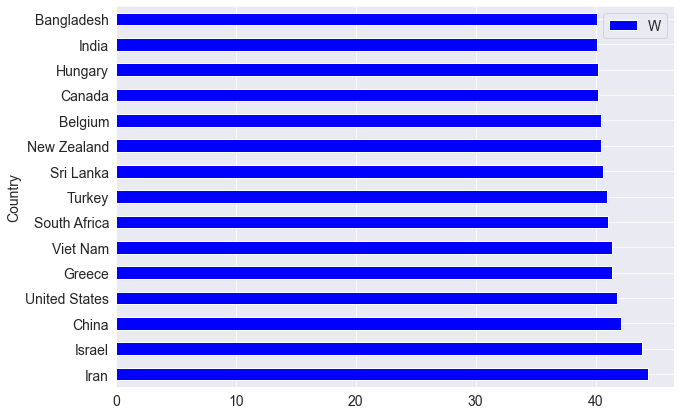

In [298]:
high_countries_df.plot.barh(color='blue')
plt.legend('WorkWeekHr')

We will try to answer if I need to start young to build a career in programming. For this we need to create a scatterplot of age versus `YearCodePro` to answer this question.

In [299]:
schema.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

Text(0, 0.5, 'Years of professional coding experience')

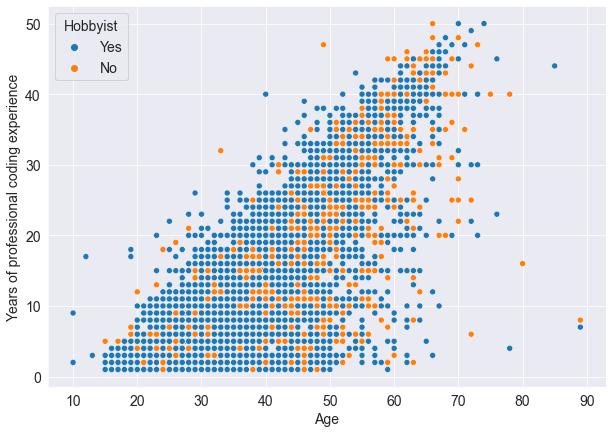

In [300]:
sns.scatterplot(x='Age',y='YearsCodePro',hue='Hobbyist',data=survey_df)
plt.xlabel('Age')
plt.ylabel('Years of professional coding experience')

As we can see from the graph that we can start programming professionally at any age so many people have been coding several decades professionally and also enjoy it as a hobby.

We can also try to view the distribution of `age1stcode` column to see which corresponding trade programming for the first time

/Users/abhishekshah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)'}, xlabel='Age1stCode', ylabel='Density'>

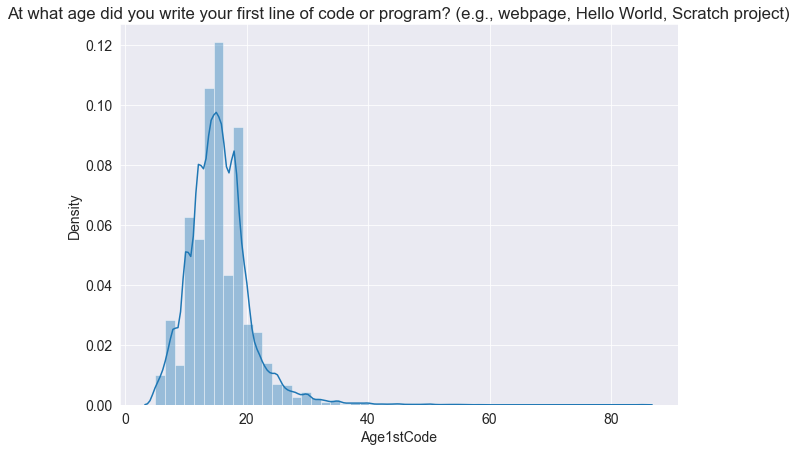

In [301]:
plt.title(schema.Age1stCode)
sns.distplot(survey_df.Age1stCode)

As we can see from this example that most people are exposed in their mid teens and very less people are getting exposed in their 30s.